In [1]:
import pandas as pd

In [16]:
#load dataset
df = pd.read_csv('data_set/train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [17]:
#filter dataset, consider only the "store=1" and its' "item=1"
df = df[df['store'] == 1]
df = df[df['item'] == 1]

In [18]:
#drop store
df.drop('store', axis=1, inplace=True)

In [20]:
#drop item
df.drop('item', axis=1, inplace=True)

In [21]:
df.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [22]:
df.shape

(1826, 2)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1826 non-null   object
 1   sales   1826 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 122.8+ KB


In [26]:
#convert 'date' property to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1826 non-null   datetime64[ns]
 1   sales   1826 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 122.8 KB


In [29]:
#Create new features to use in EDA
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday #0-monday 6-sunday

In [30]:
df.head()

,date,sales,year,month,day,weekday
0,2013-01-01,13,2013,1,1,1
1,2013-01-02,11,2013,1,2,2
2,2013-01-03,14,2013,1,3,3
3,2013-01-04,13,2013,1,4,4
4,2013-01-05,10,2013,1,5,5


In [34]:
#split dataset to build models
temp_df = df.set_index('date')
train_df = temp_df.loc[:'2017-09-30'].reset_index(drop=False)
test_df = temp_df.loc['2017-10-01':].reset_index(drop=False)

In [35]:
train_df.head()

,date,sales,year,month,day,weekday
0,2013-01-01,13,2013,1,1,1
1,2013-01-02,11,2013,1,2,2
2,2013-01-03,14,2013,1,3,3
3,2013-01-04,13,2013,1,4,4
4,2013-01-05,10,2013,1,5,5


In [36]:
test_df.head()

,date,sales,year,month,day,weekday
0,2017-10-01,21,2017,10,1,6
1,2017-10-02,12,2017,10,2,0
2,2017-10-03,18,2017,10,3,1
3,2017-10-04,15,2017,10,4,2
4,2017-10-05,20,2017,10,5,3


## EDA

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sn

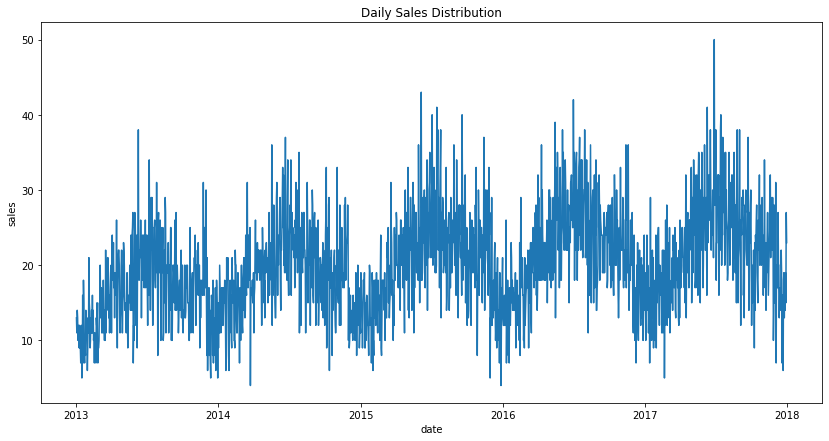

In [61]:
plt.figure(figsize=(14,7))
sn.lineplot(x='date', y='sales', data=df)
plt.title("Daily Sales Distribution")
plt.show()

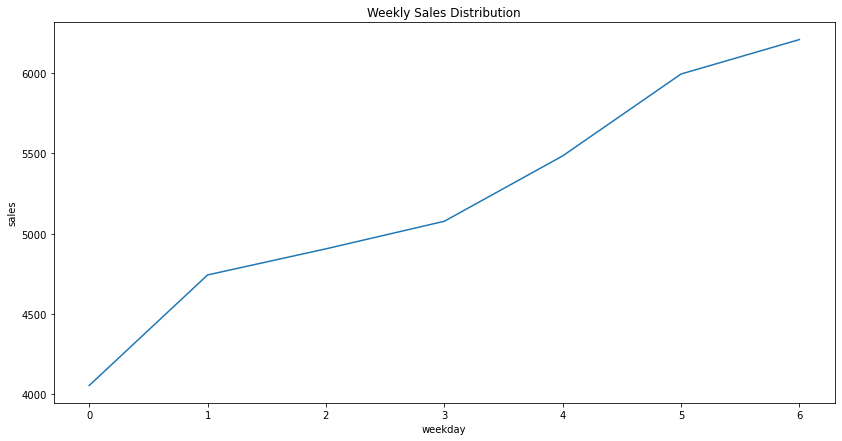

In [62]:
plt.figure(figsize=(14,7))
daily_agg = df.groupby('weekday')['sales'].sum().reset_index()
sn.lineplot(x='weekday', y='sales', data=daily_agg)
plt.title("Weekly Sales Distribution")
plt.show()

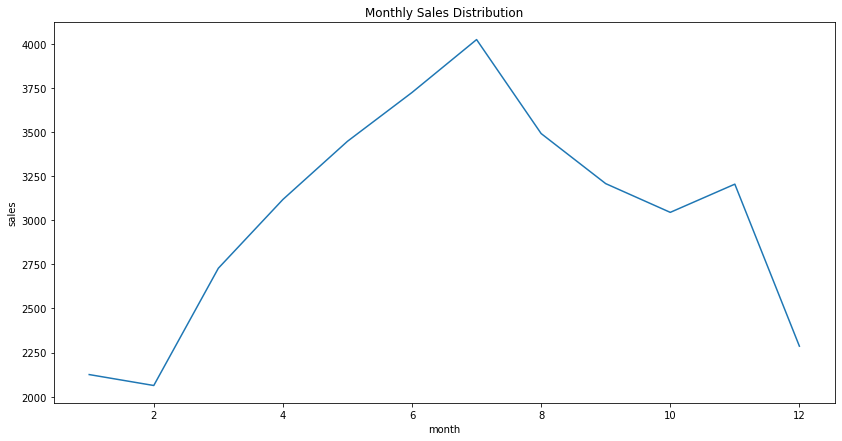

In [63]:
plt.figure(figsize=(14,7))
monthly_agg = df.groupby('month')['sales'].sum().reset_index()
sn.lineplot(x='month', y='sales', data=monthly_agg)
plt.title("Monthly Sales Distribution")
plt.show()

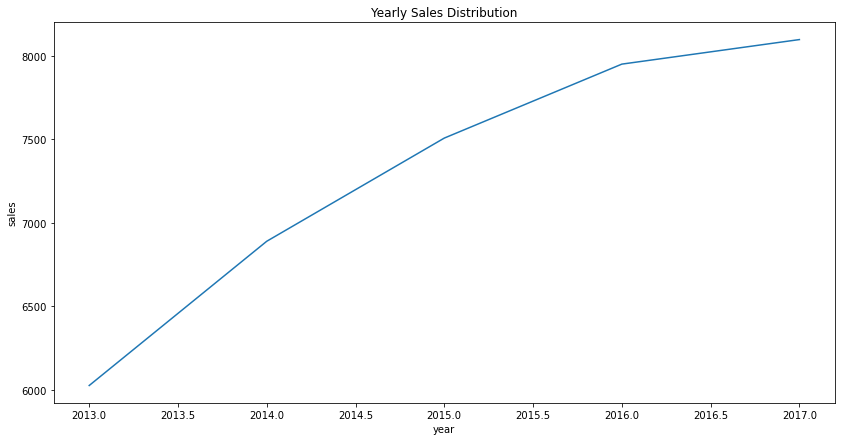

In [64]:
plt.figure(figsize=(14,7))
yealy_agg = df.groupby('year')['sales'].sum().reset_index()
sn.lineplot(x='year', y='sales', data=yealy_agg)
plt.title("Yearly Sales Distribution")
plt.show()

## The Naive Model

In [45]:
import numpy as np

In [46]:
# subtract 1 year from test data
dates = (test_df['date'] - np.timedelta64(1, 'Y')).values.astype('datetime64[D]')

In [48]:
dates

array(['2016-09-30', '2016-10-01', '2016-10-02', '2016-10-03',
       '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07',
       '2016-10-08', '2016-10-09', '2016-10-10', '2016-10-11',
       '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-15',
       '2016-10-16', '2016-10-17', '2016-10-18', '2016-10-19',
       '2016-10-20', '2016-10-21', '2016-10-22', '2016-10-23',
       '2016-10-24', '2016-10-25', '2016-10-26', '2016-10-27',
       '2016-10-28', '2016-10-29', '2016-10-30', '2016-10-31',
       '2016-11-01', '2016-11-02', '2016-11-03', '2016-11-04',
       '2016-11-05', '2016-11-06', '2016-11-07', '2016-11-08',
       '2016-11-09', '2016-11-10', '2016-11-11', '2016-11-12',
       '2016-11-13', '2016-11-14', '2016-11-15', '2016-11-16',
       '2016-11-17', '2016-11-18', '2016-11-19', '2016-11-20',
       '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
       '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
       '2016-11-29', '2016-11-30', '2016-12-01', '2016-

In [51]:
# subtract 1 year from test data + add one day
dates = (test_df['date'] - np.timedelta64(1, 'Y') + np.timedelta64(1, 'D')).values.astype('datetime64[D]')

In [52]:
dates

array(['2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
       '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08',
       '2016-10-09', '2016-10-10', '2016-10-11', '2016-10-12',
       '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16',
       '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20',
       '2016-10-21', '2016-10-22', '2016-10-23', '2016-10-24',
       '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28',
       '2016-10-29', '2016-10-30', '2016-10-31', '2016-11-01',
       '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-05',
       '2016-11-06', '2016-11-07', '2016-11-08', '2016-11-09',
       '2016-11-10', '2016-11-11', '2016-11-12', '2016-11-13',
       '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17',
       '2016-11-18', '2016-11-19', '2016-11-20', '2016-11-21',
       '2016-11-22', '2016-11-23', '2016-11-24', '2016-11-25',
       '2016-11-26', '2016-11-27', '2016-11-28', '2016-11-29',
       '2016-11-30', '2016-12-01', '2016-12-02', '2016-

In [53]:
#get the seasonal naive sales from last year
seasonal_naive_sales = train_df[train_df['date'].astype('datetime64[D]').isin(dates)]['sales']

In [54]:
seasonal_naive_sales.head()

1369    25
1370    26
1371    20
1372    28
1373    17
Name: sales, dtype: int64

In [57]:
#add those predictions to test dataset
test_df['seasonal_naive_sales'] = pd.DataFrame(seasonal_naive_sales).set_index(test_df.index)
test_df.head()

,date,sales,year,month,day,weekday,seasonal_naive_sales
0,2017-10-01,21,2017,10,1,6,25
1,2017-10-02,12,2017,10,2,0,26
2,2017-10-03,18,2017,10,3,1,20
3,2017-10-04,15,2017,10,4,2,28
4,2017-10-05,20,2017,10,5,3,17


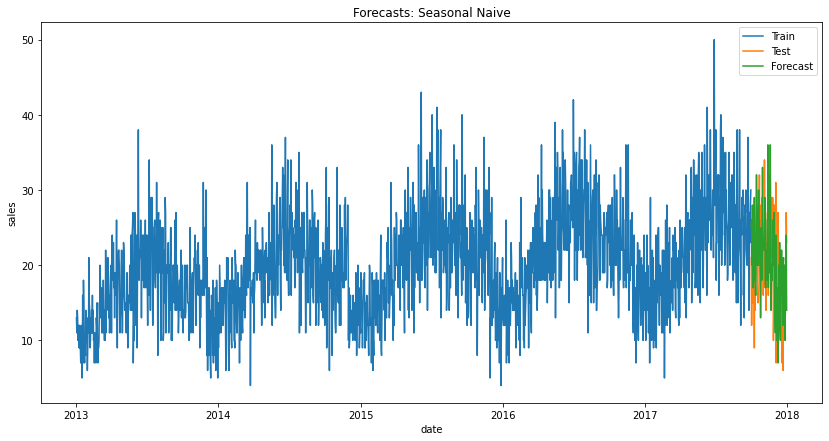

In [58]:
plt.figure(figsize=(14,7))
plt.plot(train_df['date'], train_df['sales'], label='Train')
plt.plot(test_df['date'], test_df['sales'], label='Test')
plt.plot(test_df['date'], test_df['seasonal_naive_sales'], label='Forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts: Seasonal Naive')
plt.show()

In [67]:
#Performance metrics for Naive
errors_df = test_df[['date', 'sales', 'seasonal_naive_sales']]
errors_df['errors'] = test_df['sales'] - test_df['seasonal_naive_sales']
errors_df.insert(0, 'model', 'Seasonal Naive') 

def mae(err):
    return np.mean(np.abs(err))

def rmse(err):
    return np.sqrt(np.mean(err ** 2))

def mape(err, sales=errors_df['sales']):
    return np.sum(np.abs(err))/np.sum(sales) * 100

result_df = errors_df.groupby('model').agg(total_sales=('sales', 'sum'),
                                           total_sn_pred_sales=('seasonal_naive_sales', 'sum'),
                                           overall_error=('errors', 'sum'),
                                           MAE=('errors', mae), 
                                           RMSE=('errors', rmse), 
                                           MAPE=('errors', mape))
result_df

<ipython-input-67-994479745481>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_df['errors'] = test_df['sales'] - test_df['seasonal_naive_sales']


,total_sales,total_sn_pred_sales,overall_error,MAE,RMSE,MAPE
model,,,,,,
Seasonal Naive,1861,1857,4,5.630435,7.130766,27.834498


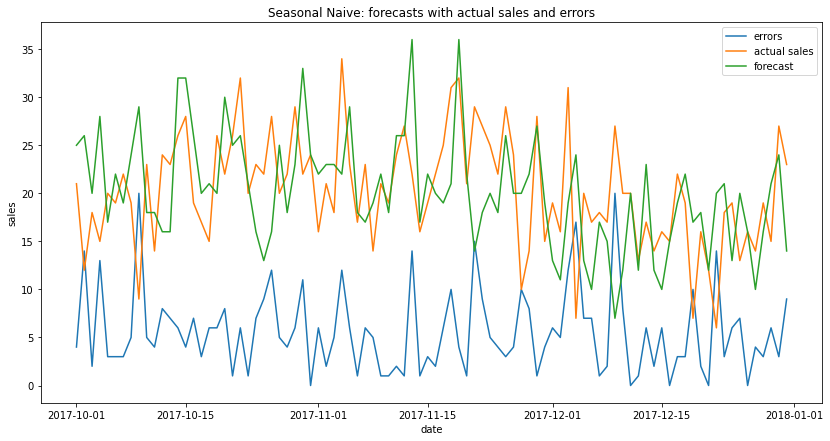

In [68]:
#plot forecast with actual and errors
plt.figure(figsize=(14,7))
plt.plot(errors_df['date'], np.abs(errors_df['errors']), label='errors')
plt.plot(errors_df['date'], errors_df['sales'], label='actual sales')
plt.plot(errors_df['date'], errors_df['seasonal_naive_sales'], label='forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Seasonal Naive: forecasts with actual sales and errors')
plt.show()